# Import Required Libraries
Import the necessary libraries, including pandas, NumPy, scikit-learn, and matplotlib.

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Preprocess Data
Load the dataset and convert datetime columns to datetime objects.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
url = 'https://raw.githubusercontent.com/marcanthonny/projectDSML/refs/heads/main/food_orders_new_delhi%20(1).csv'
df = pd.read_csv(url)

# Convert datetime columns to datetime objects
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

df.dtypes

Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
dtype: object

In [10]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


# Feature Engineering
Create new features such as 'Delivery Duration' by calculating the difference between 'Delivery Date and Time' and 'Order Date and Time'.

In [11]:
# Feature engineering
df['Delivery Duration'] = (df['Delivery Date and Time'] - df['Order Date and Time']).dt.total_seconds()

# Select relevant columns for clustering
features = df[['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks', 'Delivery Duration']]

# Normalize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Duration
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5280.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,2100.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,3480.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,2760.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,5340.0


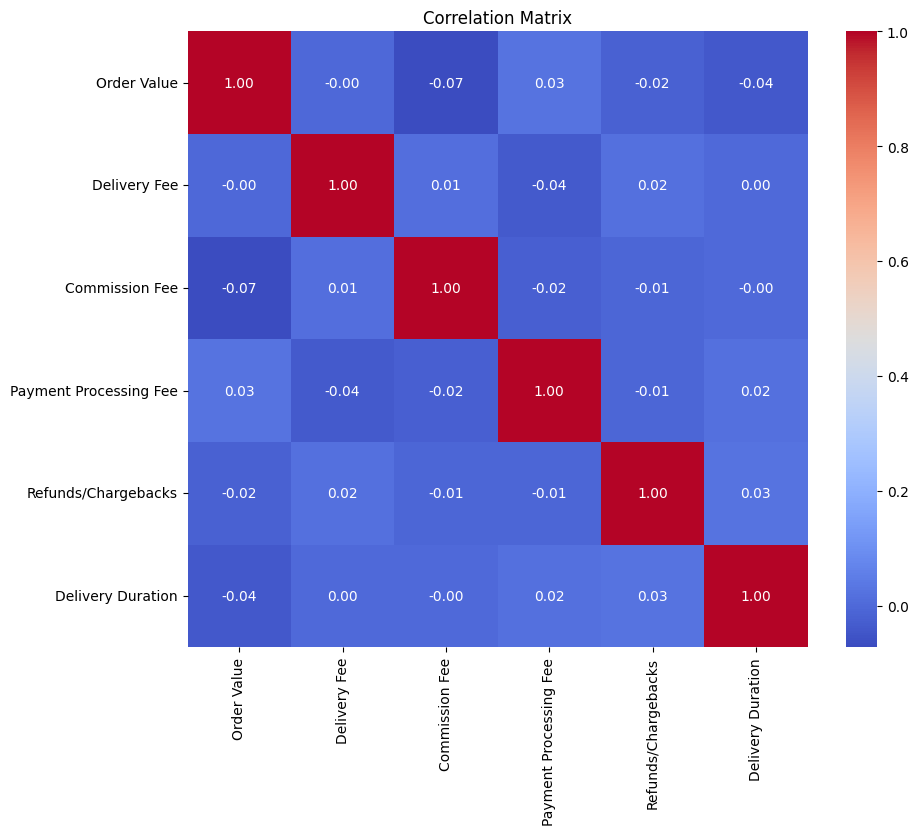

In [12]:
# Correlation analysis
correlation_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Select Relevant Columns for Clustering
Select the relevant columns for clustering, including 'Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks', and 'Delivery Duration'.

In [13]:
# Select relevant columns for clustering
columns_for_clustering = ['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks', 'Delivery Duration']
df_clustering = df[columns_for_clustering]

# Display the first few rows of the dataframe to verify the selected columns
df_clustering.head()

,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Duration
0,1914,0,150,47,0,5280.0
1,986,40,198,23,0,2100.0
2,937,30,195,45,0,3480.0
3,1463,50,146,27,0,2760.0
4,1992,30,130,50,0,5340.0


# Normalize Data
Normalize the selected features using StandardScaler.

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Convert the scaled data back to a DataFrame
df_clustering_scaled = pd.DataFrame(df_clustering_scaled, columns=columns_for_clustering)

# Display the first few rows of the scaled dataframe to verify the changes
df_clustering_scaled.head()

,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Duration
0,1.620530,-1.688516,0.534588,1.477281,-0.570686,0.554762
1,-0.128072,0.671394,1.649764,-0.587884,-0.570686,-1.483533
2,-0.220401,0.081417,1.580066,1.305184,-0.570686,-0.598990
3,0.770724,1.261372,0.441656,-0.243689,-0.570686,-1.060490
4,1.767503,0.081417,0.069931,1.735427,-0.570686,0.593221


# Apply K-Means Clustering
Apply K-Means clustering algorithm to the normalized data and assign cluster labels to the dataset.

In [15]:
# Apply K-Means clustering algorithm to the normalized data
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters (n_clusters) as needed

# Fit the K-Means algorithm to the scaled data
kmeans.fit(df_clustering_scaled)

# Assign cluster labels to the dataset
df_clustering_scaled['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels to verify the changes
df_clustering_scaled.head()

# Visualize clusters
plt.figure(figsize=(15, 5))

C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

# Visualize Clusters
Create scatter plots to visualize the clusters based on different feature pairs, such as 'Order Value' vs 'Delivery Duration', 'Order Value' vs 'Delivery Fee', and 'Delivery Fee' vs 'Delivery Duration'.

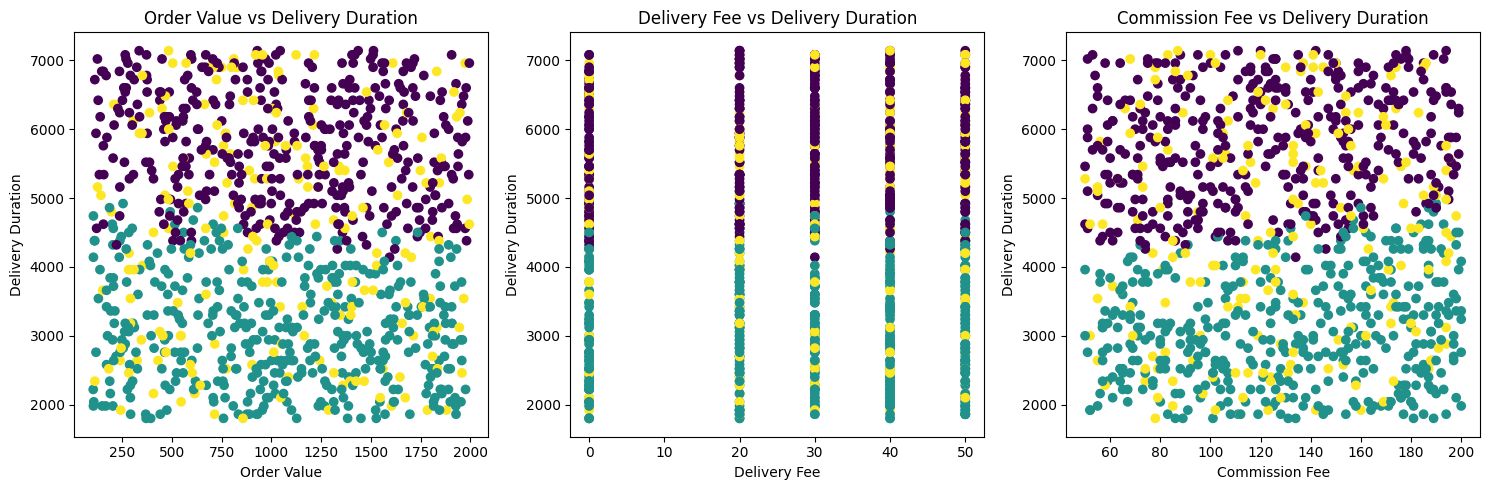

In [16]:
# Visualize clusters
plt.figure(figsize=(15, 5))

# Scatter plot 1
plt.subplot(1, 3, 1)
plt.scatter(df['Order Value'], df['Delivery Duration'], c=df_clustering_scaled['Cluster'], cmap='viridis')
plt.xlabel('Order Value')
plt.ylabel('Delivery Duration')
plt.title('Order Value vs Delivery Duration')

# Scatter plot 2
plt.subplot(1, 3, 2)
plt.scatter(df['Delivery Fee'], df['Delivery Duration'], c=df_clustering_scaled['Cluster'], cmap='viridis')
plt.xlabel('Delivery Fee')
plt.ylabel('Delivery Duration')
plt.title('Delivery Fee vs Delivery Duration')

# Scatter plot 3
plt.subplot(1, 3, 3)
plt.scatter(df['Commission Fee'], df['Delivery Duration'], c=df_clustering_scaled['Cluster'], cmap='viridis')
plt.xlabel('Commission Fee')
plt.ylabel('Delivery Duration')
plt.title('Commission Fee vs Delivery Duration')

plt.tight_layout()
plt.show()